# Graphs depicting the blacklisting frequency of a liar infiltrating multiple clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
distance = 1500
nbClusters = 4
nbNodesRange = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
withSuspects = True


filename = "cluster_infiltration_N_" + str(nbNodesRange[0]) + "_to_" +\
    str(nbNodesRange[len(nbNodesRange)-1]) + "_with_" + str(nbClusters) + "_clusters"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,c3,c4,liar_caught
51877,12,3,4,4,1,False
51889,12,2,3,4,3,False
51944,12,3,2,3,4,False
51969,12,3,3,3,3,False
52005,12,2,4,4,2,False
52051,12,4,2,3,3,False
52070,12,4,4,2,2,False
52091,12,4,2,2,4,False
52381,12,4,3,4,1,False
52392,12,1,3,4,4,False


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,10,34,50
1,11,24,58
2,12,46,87
3,13,46,102
4,14,30,136
5,15,48,151
6,16,55,198
7,17,51,228
8,18,74,270
9,19,69,306


Text(0.5, 1.0, 'How often a liar got caught infiltrating 4 clusters at once')

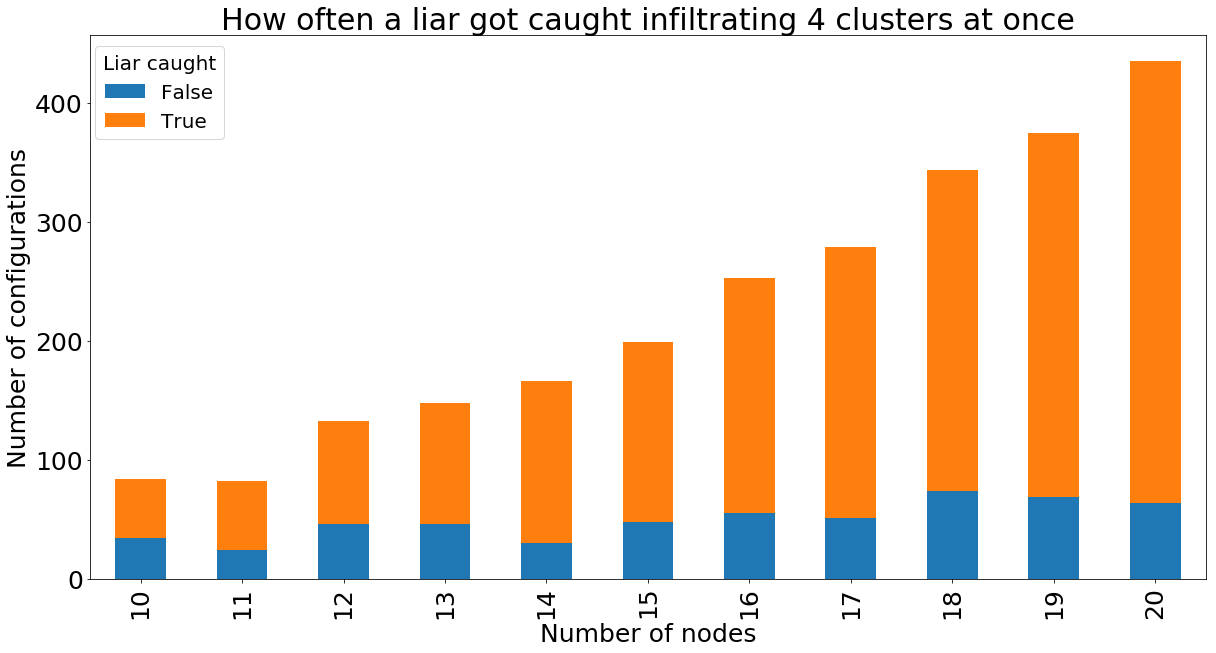

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]][data["N"] <26].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", fontsize=25)
ax.set_ylabel("Number of configurations", fontsize=25)
ax.set_xlabel("Number of nodes", fontsize=25)
plt.legend(bbox_to_anchor=(0.12, 0.98), loc=1, borderaxespad=0., fontsize=20, title="Liar caught", 
           title_fontsize="20")

plt.title("How often a liar got caught infiltrating " + str(nbClusters)+" clusters at once", fontsize=30)

In [7]:
fig.savefig('graphs/blacklisting_percentages/'+filename+'.png')

In [8]:
if nbClusters == 2:
    data["imbalance"] = (data["c1"]/data["c2"]).round(3)
    fig1, ax1 = plt.subplots(figsize=(50, 15))
    data[["imbalance", "liar_caught"]].drop_duplicates()\
        .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
        .plot.bar(stacked=True, ax=ax1, x="imbalance", rot=90,
                  title="Node imbalance between "+str(nbClusters)+" clusters")
    fig1.savefig('graphs/cluster_ratios/'+filename+'_cluster_ratio.png')